In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Pc\\Downloads\\adult.data.csv')
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#exploring the data set
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
#checing for missing values
for nulls in df.columns:
    missing = np.sum(df[nulls].isnull())
    print('{} - {}'.format(nulls, missing))

age - 0
workclass - 0
fnlwgt - 0
education - 0
education-num - 0
marital-status - 0
occupation - 0
relationship - 0
race - 0
sex - 0
capital-gain - 0
capital-loss - 0
hours-per-week - 0
native-country - 0
salary - 0


In [5]:
#How many people of each race are represented in this dataset?
df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [6]:
#What is the average age of men?
male_data = df[df['sex'] == 'Male']
avg_data = male_data['age'].mean()
avg_data

39.43354749885268

In [7]:
#What is the percentage of people who have a Bachelor's degree?
degree = df[df['education'] == 'Bachelors'] 
percentage = (len(degree) / len(df['education'])) * 100
print(f'{percentage}%')

16.44605509658794%


In [8]:
#What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
advanced_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
income = advanced_education[advanced_education['salary'] == '>50K']
percentage = (len(income)) / (len(advanced_education)) * 100
percentage

46.535843011613935

In [9]:
#What percentage of people without advanced education make more than 50K?
not_advanced = df[df['education'] != ('Bachelors', 'Masters' or 'Doctorate')]
income = not_advanced[not_advanced['salary'] > '>50K']
percentage = (len(income) / len(not_advanced)) * 100
print(f'{percentage}%')

0.0%


In [10]:
#What is the minimum number of hours a person works per week?
df['hours-per-week'].min()

1

In [11]:
#What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
min_hours_per_week = df['hours-per-week'].min()
hours = df[df['hours-per-week'] == min_hours_per_week]
salary = hours[hours['salary'] == '>50K']
percentage = (len(salary) / len(hours)) * 100
print(f'{percentage}%')

10.0%


In [12]:
# What country has the highest percentage of people that earn >50K?

countries = df[df['native-country'] == 'India']
highest_earning_country = countries[countries['salary'] == '>50K']

highest_earning_country_percentage = (len(highest_earning_country)) / (len(countries)) * 100
print(highest_earning_country_percentage)

40.0


In [13]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [14]:
#percentage of married people
married = df[df['marital-status'] == 'Married-civ-spouse']
married =  (len(married)) / (len(df['marital-status'])) * 100
married

45.99367341297872

In [15]:
#percentage of divoced pople
divosed =df[df['marital-status'] == 'Divorced']
divosed = (len(divosed)) / (len(df['marital-status'])) * 100
divosed

13.645158318233468

In [16]:
#percentage of people who were never married.
never_married = df[df['marital-status'] == 'Never-married']
never_married = (len(never_married)) / (len(df['marital-status'])) * 100
never_married

32.809188906974605

In [17]:
#percentage of people who seeperated
seperated = df[df['marital-status'] == 'Separated']
seperated = (len(seperated)) / (len(df['marital-status'])) * 100
seperated

3.1479377169005867

In [18]:
#percentage of people who were widowed.
widowed = df[df['marital-status'] == 'Widowed']
widowed = (len(widowed)) / (len(df['marital-status'])) * 100
widowed

3.0496606369583246

In [19]:
#percentage of people with absent spouses.
absent = df[df['marital-status'] == 'Married-spouse-absent']
absent = (len(absent)) / (len(df['marital-status'])) * 100
absent

1.2837443567458

In [20]:
# percentage of af_spouse

af_spouse = df[df['marital-status'] == 'Married-AF-spouse']
af_spouse = (len(af_spouse)) / (len(df['marital-status'])) * 100
af_spouse

0.07063665120850096

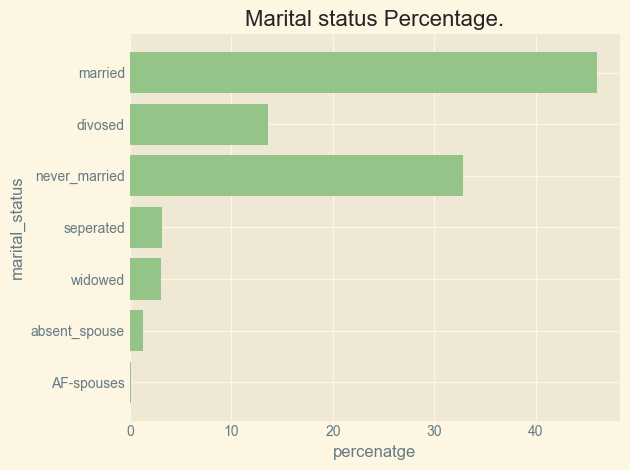

In [50]:
#a barchat chart showing the percentage proportion of marital status
labels = ['married', 'divosed', 'never_married', 'seperated', 'widowed', 'absent_spouse', 'AF-spouses']
list = [married, divosed, never_married, seperated, widowed, absent, af_spouse]
list.reverse()
labels.reverse()
plt.style.use('Solarize_Light2')
plt.barh(labels, list, color = '#95C489')
plt.title('Marital status Percentage.')
plt.ylabel('marital_status')
plt.xlabel('percenatge')
plt.grid(True)
plt.tight_layout()
plt.show()